<h1> Lecture 9: The Likelihood </h1>

<p>For every single measurent and a defined pdf f(x) associated we calculare le likelihood as the product of the pdf evaluated on the single measurement respect a parameter we want to estimate</p> 

$$L(\theta)=\prod_{i}^{N}f(x_{i},\theta)$$

<p> An example of parameter of a pdf f(x) can be in the gaussian distribution the mean and the standard deviation </p>

<p> is it possible to define a log likelihood function as below in this kind of way the numerical operation is more stable </p>

$$log(L(\theta)) = \sum_{i = 1}^N log(f(x_{i}, \theta ))$$

In [ ]:
from math import log

#------------------------------------------------------------------------------------
#this method calculate le loglikelihood of a parameter theta  and return it's value
#------------------------------------------------------------------------------------

def loglikelihood(pdf,theta, sample):
    
    loglike = 0 

    for x in sample:
        if pdf(x,theta) > 0.: loglike += log(pdf(x,theta))
    
    return loglike
    

<h3> Exercise 9.1 </h3>
<p> Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list. </p>

In [12]:
import random
import numpy as np

# ---------------------------------------------------------------------------------------------------------------
#this method  generate a single event that follow an exponential pdf
#---------------------------------------------------------------------------------------------------------------

def rand_exp(tau,seed = 0.):
     
     if tau <= 0 : raise ValueError('Tau must be a positive number')
     if seed != 0. : random.seed(float(seed))
     y = random.random()
     f = lambda y : -tau*np.log(1-y) # cumulative distribution function for an exponential pdf(x)
     return f(y)

def generate_exp(tau,N,seed = 0.):
     exp = []
     if seed != 0. : random.seed(float(seed))
     for i in range(N): exp.append(rand_exp(tau,seed))
     return exp

def main():
    
    tau = 2.
    N = 50

    sample = generate_exp(tau,N)
    print(sample)

if __name__ == "__main__": main()


[2.9088693556250784, 3.8319993346668486, 0.0949735653789906, 2.009584743297568, 0.46535958035946073, 3.69840144169869, 2.6954827440430793, 5.75600185916004, 0.9675133066979804, 6.526731010463708, 0.17808481585250727, 1.2166575056298337, 3.018894499738734, 0.06516986341864649, 1.8484325973808222, 0.19886716552651487, 0.8464027614052988, 6.014512192481359, 4.4994077939609465, 1.3946161243268536, 1.0755549710577774, 0.5791707220354251, 0.4455832369862598, 2.111840315996367, 14.51091310339793, 6.264857201317111, 0.5030752178459161, 2.0529051197549326, 2.8237601812676125, 1.2632050909723613, 1.7005779585347207, 0.8179545884809112, 0.9743703599746376, 1.8251247602985607, 0.004710396023098759, 3.8656677294187602, 1.7500188726129866, 1.3561025560595725, 1.4502031170905627, 2.5952538344424254, 0.80674228643191, 2.652425697802425, 1.1763076002464485, 4.528491618380487, 4.8903802050155205, 1.1239187750240702, 0.652783145940233, 3.2694591054213835, 1.7796654914999435, 0.48127497641685396]


<h3> Exercise 9.2 </h3>
<p>Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen. </p>

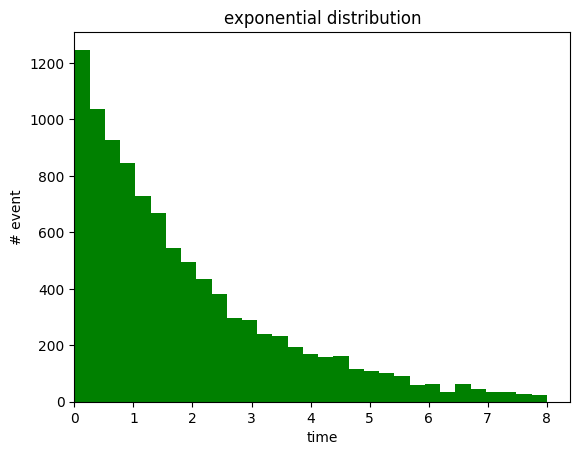

In [38]:
from math import ceil
import matplotlib.pyplot as plt 

#---------------------------------------------------------------------------------------------------------------
#This function calculate the optimal numbers of bins for making an in Histogram un function of the number of 
#events
#---------------------------------------------------------------------------------------------------------------

def sturges(N_events):
    
    if len(N_events) != 1 :
        return ceil(1+3.322 * np.log(len(N_events)))
    else:
        return ceil(1+3.322 * np.log(N_events))

# ---------------------------------------------------------------------------------------------------------------

def main():
    
    tau = 2.
    N = 10000

    measure = generate_exp(tau,N)
    xmin = 0
    xmax = 4*tau
    nbins = sturges(measure)
    bins_edges = np.linspace(xmin,xmax,nbins)

    plt.hist(measure,bins = bins_edges, color = 'green')
    plt.xlim(0)
    plt.title("exponential distribution")
    plt.xlabel("time")
    plt.ylabel("# event")

    

    
    
if __name__ == '__main__': main()


<h3> Exercise 9.3 </h3>
<p>Write a program that plots the exponential probability distribution with a fixed parameter t0. </p>

In [39]:
from math import exp

def exp_func(x,tau):
    exp = lambda x : 1/tau*exp(-x/tau)
    return exp

tau = 2.0

xmin = 0
xmax = 4*tau

    



[   0    1    2 ... 9997 9998 9999]
